元ネタ： VAMPnets for deep learning of molecular kinetics
Andreas Mardt1, Luca Pasquali1, Hao Wu1 & Frank Noé

- A trajectory of 50,000 time steps is generatede.
- Three layer VAMPnets are set up with 1-5-10-5 nodes in each lobe.

### assymetry double well potential上を動くブラウン運動のデータを作成

ポテンシャル関数の数式は
$V(x)=(x-2.0)^4-6.0*(x-2.0)^2+2.0*(x-2.0)$

`make_dataset/brown_model/data_generator.py` で定義されている.
```python
def asymmetric_double_well_energy(x):
    r"""computes the potential energy at point x"""
    _x = x - 2.0
    return 2.0 * _x - 6.0 * _x ** 2 + _x ** 4`
```

In [1]:
!python ./make_dataset/brown_model/make_data_adw.py

(50001, 1)
[[-0.05178214]
 [-0.04549632]
 [-0.28804152]
 ...
 [ 2.00622921]
 [ 2.85903837]
 [ 2.40157594]]
(500, 100, 1)
(100, 500, 1)
Figure(600x200)


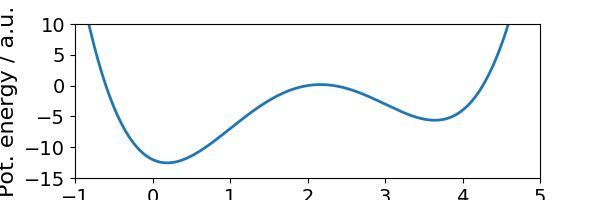

In [2]:
from IPython.display import Image, display_png
display_png(Image("make_dataset/brown_model/adw_potential.png"))

In [3]:
import numpy as np
adw_traj1 = np.load("make_dataset/brown_model/adw_traj1.npy")
print(adw_traj1.shape)
print(adw_traj1)

(500, 100, 1)
[[[-0.24308279]
  [ 1.16216337]
  [ 1.15409927]
  ...
  [ 0.37551958]
  [ 0.57444443]
  [ 0.24098899]]

 [[ 0.46676871]
  [ 0.38243221]
  [ 0.63251721]
  ...
  [ 0.57197266]
  [ 0.59321906]
  [ 0.2270376 ]]

 [[ 0.42368393]
  [-0.01535896]
  [-0.46090961]
  ...
  [ 0.44702397]
  [ 0.80299958]
  [ 0.47055704]]

 ...

 [[ 1.86444628]
  [ 2.58698442]
  [ 1.71737899]
  ...
  [-0.26328155]
  [ 0.15976094]
  [ 0.02401691]]

 [[-0.1032148 ]
  [ 0.00313787]
  [-0.26269559]
  ...
  [ 2.50274827]
  [ 2.82628165]
  [ 2.05517373]]

 [[ 1.25341273]
  [ 1.01249011]
  [ 1.48835797]
  ...
  [ 0.0268704 ]
  [ 0.73165271]
  [ 1.20698814]]]


上と同様に作成されたデータがsample_adw/datasetに配置されている.

In [4]:
!cat sample_adw/config_adw.json

In [5]:
!cat sample_adw/hyparam_adw.json

{
    "emission_internal_layers": [
        {
            "name": "fc",
            "dim_output": 32
        }
    ],
	"transition_internal_layers": [
        {
            "name": "fc"
        }
    ],
    "variational_internal_layers": [
        {
            "name": "lstm"
        },
        {
            "name": "fc"
        }
    ],
    "potential_internal_layers": [
        {
            "name": "fc"
        }
    ],
    "evaluation": {
        "all_costs": [
            0.0,
            0.0,
            0.0
        ],
        "cost": 0.0,
        "error": 0.0,
        "validation_all_costs": [
            0.0,
            0.0,
            0.0
        ],
        "validation_cost": 0.0
    },
    "evaluation_output": "sample_adw/model/hyparam.result.json",
    "plot_path": "sample_adw/model/plot",
    "save_model_path": "sample_adw/model/model",
    "save_result_filter": "sample_adw/model/result/filter.jbl",
    "save_result_test": "sample_adw/model/result/test.jbl",
    "save_res

In [6]:
!mkdir -p sample_adw/model 

In [7]:
!dmm --config sample_adw/config_adw.json\
--hyperparam sample_adw/hyparam_adw.json\
--save-config sample_adw/config.result.json train


2020-03-12 11:11:35.201082: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-03-12 11:11:35.201347: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
#training data: 400
#valid data: 100
train_data_size: 400
batch_size     : 100
n_steps        : 100
dim_emit       : 1


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed th

epoch 130, training cost 3.6369 (error=0.0226245), validation cost 3.61381 (error=0.0221117)
epoch 140, training cost 3.63696 (error=0.022626), validation cost 3.61445 (error=0.0221271)
epoch 150, training cost 3.6369 (error=0.0226259), validation cost 3.61418 (error=0.0221217)
epoch 160, training cost 3.63763 (error=0.0226409), validation cost 3.61664 (error=0.0221768)
epoch 170, training cost 3.63717 (error=0.0226328), validation cost 3.61541 (error=0.0221509)
epoch 180, training cost 3.63697 (error=0.0226272), validation cost 3.61473 (error=0.0221322)
epoch 190, training cost 3.63725 (error=0.0226337), validation cost 3.61585 (error=0.0221594)
epoch 200, training cost 3.63689 (error=0.0226257), validation cost 3.61429 (error=0.0221224)
epoch 210, training cost 3.63748 (error=0.022639), validation cost 3.61653 (error=0.0221757)
epoch 220, training cost 3.63694 (error=0.0226271), validation cost 3.61461 (error=0.0221309)
epoch 230, training cost 3.63687 (error=0.022625), validation co

In [9]:
!dmm --config sample_adw/config_adw.json\
--hyperparam sample_adw/hyparam_adw.json\
--save-config sample_adw/config.result.json test


2020-03-13 01:54:14.438959: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-03-13 01:54:14.441210: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
#training data: 0
#valid data: 500
test_data_size: 500
batch_size     : 100
n_steps        : 100
dim_emit       : 1
alpha          : 0.1


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functiona

In [10]:
!dmm --config sample_adw/config_adw.json\
--hyperparam sample_adw/hyparam_adw.json\
--save-config sample_adw/config.result.json filter


2020-03-13 01:56:39.604064: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-03-13 01:56:39.606413: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
#training data: 0
#valid data: 500
data_size 500 batch_size 100 , n_step 100 , dim_emit 1

(?, 101, 2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https:/

In [15]:
!python script/plot_p.py --config ./sample_adw/config.result.json --hyperparam sample_adw/model/hyparam.result.json --limit_all 10 all

==== save_result_filter
[LOAD]: sample_adw/model/result/filter.jbl
[LOAD]: sample_adw/dataset/adw_traj1.npy
z: (10, 500, 101, 2)
data index: 0
dimension (observation): 0
plotting dimension (latent): 0 - 1
steps: 100
[SAVE] : sample_adw/model/plot/0_data0_p.png
data index: 1
dimension (observation): 0
plotting dimension (latent): 0 - 1
steps: 100
[SAVE] : sample_adw/model/plot/1_data1_p.png
data index: 2
dimension (observation): 0
plotting dimension (latent): 0 - 1
steps: 100
[SAVE] : sample_adw/model/plot/2_data2_p.png
data index: 3
dimension (observation): 0
plotting dimension (latent): 0 - 1
steps: 100
[SAVE] : sample_adw/model/plot/3_data3_p.png
data index: 4
dimension (observation): 0
plotting dimension (latent): 0 - 1
steps: 100
[SAVE] : sample_adw/model/plot/4_data4_p.png
data index: 5
dimension (observation): 0
plotting dimension (latent): 0 - 1
steps: 100
[SAVE] : sample_adw/model/plot/5_data5_p.png
data index: 6
dimension (observation): 0
plotting dimension (latent): 0 - 1
ste

In [16]:
!python script/plot.py --config ./sample_adw/config.result.json --hyperparam sample_adw/model/hyparam.result.json --limit_all 10 all

==== save_result_test
[LOAD]: sample_adw/model/result/test.jbl
[LOAD]: sample_adw/dataset/adw_traj1.npy
dict_keys(['z_s', 'z_params', 'z_pred_params', 'obs_params', 'obs_pred_params', 'config'])
z_q.shape= (500, 100, 2)
obs: (500, 100, 1)
obs: (500, 100, 1)
data index: 0
error= 2.2527419576225634
dimension (observation): 0
steps: 100
upper plot:z_q: (100, 2)
No handles with labels found to put in legend.
[SAVE] : sample_adw/model/plot/0_data0_plot.png
data index: 1
error= 2.2527419576225634
dimension (observation): 0
steps: 100
upper plot:z_q: (100, 2)
No handles with labels found to put in legend.
[SAVE] : sample_adw/model/plot/1_data1_plot.png
data index: 2
error= 2.2527419576225634
dimension (observation): 0
steps: 100
upper plot:z_q: (100, 2)
No handles with labels found to put in legend.
[SAVE] : sample_adw/model/plot/2_data2_plot.png
data index: 3
error= 2.2527419576225634
dimension (observation): 0
steps: 100
upper plot:z_q: (100, 2)
No handles with labels found to put in legend